In [1]:
import pandas as pd
import numpy as np
import re
import itertools
import time
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Trip_Advisor_cleaned.csv', index_col=0)

In [3]:
df.head()

,Review,Rating,Review2
0,nice hotel expens park good deal stay hotel an...,4,nice hotel expens park good deal hotel anniver...
1,noth special charg diamond member hilton decid...,2,noth special charg diamond member hilton decid...
2,nice room experi hotel monaco seattl good hote...,3,nice room experi hotel monaco seattl good hote...
3,uniqu great stay wonder time hotel monaco loca...,5,uniqu great wonder hotel monaco locat excel sh...
4,great stay great stay go seahawk game awesom d...,5,great great seahawk game awesom downfal view b...


In [4]:
df.columns

Index(['Review', 'Rating', 'Review2'], dtype='object')

In [5]:
df.shape

(20491, 3)

In [6]:
data = df.drop(['Review'],axis=1)
data.head()

,Rating,Review2
0,4,nice hotel expens park good deal hotel anniver...
1,2,noth special charg diamond member hilton decid...
2,3,nice room experi hotel monaco seattl good hote...
3,5,uniqu great wonder hotel monaco locat excel sh...
4,5,great great seahawk game awesom downfal view b...


In [7]:
data['Word_count']= data['Review2'].map(lambda x: len(x.split()))

In [8]:
data.head()

,Rating,Review2,Word_count
0,4,nice hotel expens park good deal hotel anniver...,68
1,2,noth special charg diamond member hilton decid...,195
2,3,nice room experi hotel monaco seattl good hote...,149
3,5,uniqu great wonder hotel monaco locat excel sh...,74
4,5,great great seahawk game awesom downfal view b...,148


<AxesSubplot:xlabel='Rating', ylabel='Word_count'>

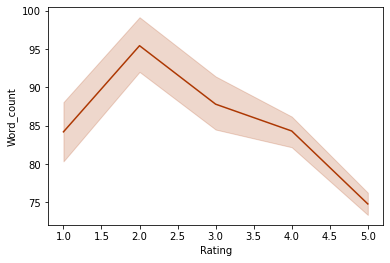

In [9]:
sns.set_palette('Oranges_r')
sns.lineplot(x='Rating', data=data, y='Word_count')

### Showing the Most used Words 

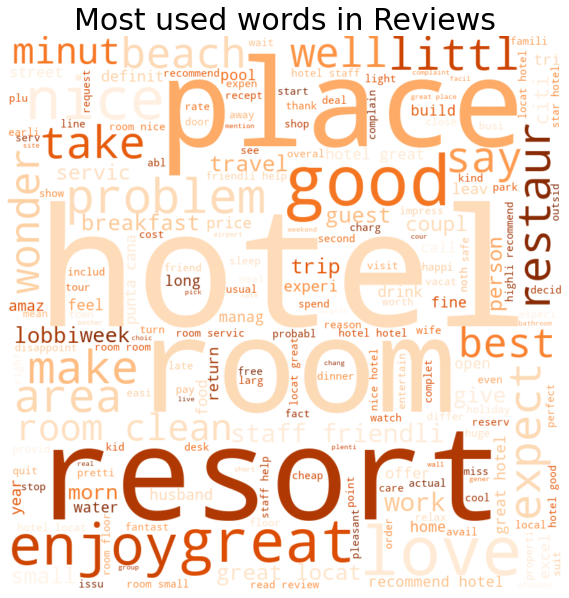

In [10]:
from wordcloud import WordCloud # Most used Words
plt.figure(figsize = (8, 8), facecolor = None)
wordcloud=WordCloud(background_color="White",width = 800, height = 800,colormap="Oranges_r", min_font_size = 10).generate(" ".join(data.Review2[100:]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad = 0) 
plt.title("Most used words in Reviews",fontsize=30)
plt.axis("off")
plt.show()

## Sentiment Analysis

In [11]:
# most reviewers leave a 4 & 5 star review
data.Rating.value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [12]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alanoudabdulaziz/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### Segregating and Encoding Positive, Neutral and Negative labels


In [13]:
pos = [4, 5]
neg = [1, 2]
neu = [3]

# Remove 3 star reviews
data = data[data.Rating!=3]

def sentiment(rating):
    if rating in pos:
        return 'Positive'
    else:
        return 'Negative'  
data['Sentiment'] = data['Rating'].apply(sentiment)
data.head()

,Rating,Review2,Word_count,Sentiment
0,4,nice hotel expens park good deal hotel anniver...,68,Positive
1,2,noth special charg diamond member hilton decid...,195,Negative
3,5,uniqu great wonder hotel monaco locat excel sh...,74,Positive
4,5,great great seahawk game awesom downfal view b...,148,Positive
5,5,love monaco staff husband hotel crazi weekend ...,115,Positive


In [14]:
data.shape

(18307, 4)

/Users/alanoudabdulaziz/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

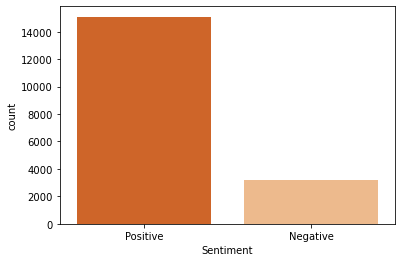

In [15]:
sns.countplot(data['Sentiment'],palette='Oranges_r')

##### Generating Sentiment Scores using Vader Sentiment Analyzer

VADER A SentimentAnalyzer is a tool to implement and facilitate Sentiment Analysis tasks using NLTK features and classifiers, especially for teaching and demonstrative purposes.

In [16]:
data['scores'] = data['Review2'].apply(lambda review: sid.polarity_scores(review))

In [17]:
data.head()

,Rating,Review2,Word_count,Sentiment,scores
0,4,nice hotel expens park good deal hotel anniver...,68,Positive,"{'neg': 0.031, 'neu': 0.645, 'pos': 0.325, 'co..."
1,2,noth special charg diamond member hilton decid...,195,Negative,"{'neg': 0.024, 'neu': 0.722, 'pos': 0.254, 'co..."
3,5,uniqu great wonder hotel monaco locat excel sh...,74,Positive,"{'neg': 0.0, 'neu': 0.587, 'pos': 0.413, 'comp..."
4,5,great great seahawk game awesom downfal view b...,148,Positive,"{'neg': 0.07, 'neu': 0.661, 'pos': 0.269, 'com..."
5,5,love monaco staff husband hotel crazi weekend ...,115,Positive,"{'neg': 0.021, 'neu': 0.83, 'pos': 0.149, 'com..."


In [18]:
# Note that the dataset has mostly positive reviews
data.Sentiment.value_counts(normalize=True)

Positive    0.824439
Negative    0.175561
Name: Sentiment, dtype: float64

In [19]:
# Include only the sentiment and reviews columns
df1 = data[['Sentiment', 'Review2']]
df1.head()

,Sentiment,Review2
0,Positive,nice hotel expens park good deal hotel anniver...
1,Negative,noth special charg diamond member hilton decid...
3,Positive,uniqu great wonder hotel monaco locat excel sh...
4,Positive,great great seahawk game awesom downfal view b...
5,Positive,love monaco staff husband hotel crazi weekend ...


## Prepare Data for Modeling

In [20]:
# Split the data into X and y data sets
X = df1.Review2
y = df1.Sentiment

In [21]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Create TF-IDF versions 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)

### 1- Classifying using Logistic Regression With TF-IDF

In [23]:
# Create a logistic regression model to use
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [24]:
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="Oranges");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

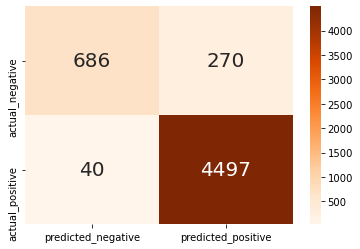

In [25]:
# Fit the first logistic regression on the TF-IDF data
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)
cm1 = conf_matrix(y_test, y_pred_tfidf1_lr)

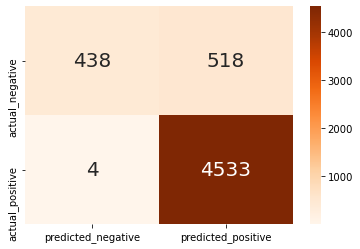

In [26]:
# Fit the second logistic regression on the TF-IDF data
lr.fit(X_train_tfidf2, y_train)
y_pred_tfidf2_lr = lr.predict(X_test_tfidf2)
cm2 = conf_matrix(y_test, y_pred_tfidf2_lr)

In [27]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(zip(cm1, cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LR1-TFIDF', 'LR2-TFIDF']
results

,LR1-TFIDF,LR2-TFIDF
Accuracy,0.944,0.905
Precision,0.943,0.897
Recall,0.991,0.999
F1 Score,0.966,0.945


###  2 - Classifying using Naive Bayes  With TF-IDF

In [28]:
# Fit the first Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_tfidf1, y_train)

y_pred_tfidf1_nb = mnb.predict(X_test_tfidf1)

In [29]:
# Fit the second Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_tfidf2, y_train)

y_pred_tfidf2_nb = bnb.predict(X_test_tfidf2)

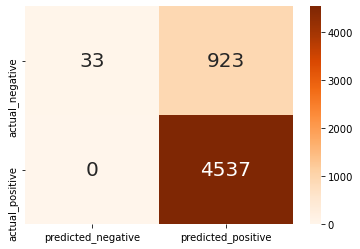

In [30]:
# Here's the heat map for the first Naive Bayes model
cm3 = conf_matrix(y_test, y_pred_tfidf1_nb)

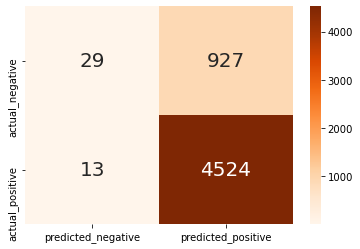

In [31]:
# Here's the heat map for the second Naive Bayes model
cm4 = conf_matrix(y_test, y_pred_tfidf2_nb)

In [32]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(zip(cm3, cm4)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['Naive1-TFIDF', 'Naive2-TFIDF']
results

,Naive1-TFIDF,Naive2-TFIDF
Accuracy,0.832,0.829
Precision,0.831,0.830
Recall,1.000,0.997
F1 Score,0.908,0.906


### 3 - Ada Boost Classifier  With TF-IDF

In [33]:
#Fit the first Ada Boost model
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
abc = AdaBoostClassifier()
# Train Adaboost Classifer
abc.fit(X_train_tfidf1, y_train)

y_pred_tfidf1_ab = abc.predict(X_test_tfidf1)

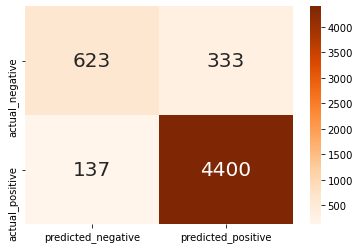

In [34]:
# Here's the heat map for the first Ada Boost model
cm5 = conf_matrix(y_test, y_pred_tfidf1_ab)

In [35]:
#Fit the second Ada Boost  model
abc = AdaBoostClassifier()
# Train Adaboost Classifer
abc.fit(X_train_tfidf2, y_train)

y_pred_tfidf2_ab = abc.predict(X_test_tfidf2)

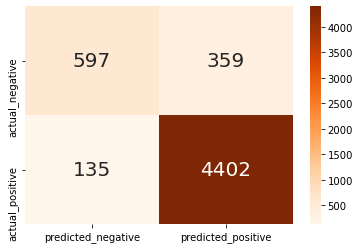

In [36]:
# Here's the heat map for the first Ada Boost model
cm6 = conf_matrix(y_test, y_pred_tfidf2_ab)

In [37]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(zip(cm5, cm6)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['AdaBoost1-TFIDF', 'AdaBoost2-TFIDF']
results

,AdaBoost1-TFIDF,AdaBoost2-TFIDF
Accuracy,0.914,0.910
Precision,0.930,0.925
Recall,0.970,0.970
F1 Score,0.950,0.947


### 4 - SVM With TF-IDF Vectorizer

In [38]:
#Support Vector Machines with Scikit-learn for first model
from sklearn import svm
svm = svm.SVC(probability=True)

svm.fit(X_train_tfidf1, y_train)

y_pred_tfidf1_sv= svm.predict(X_test_tfidf1)

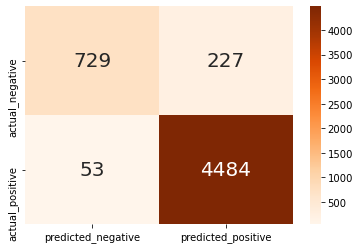

In [39]:
# Here's the heat map for the first Ada Boost model
cm7 = conf_matrix(y_test, y_pred_tfidf1_sv)

In [40]:
#Support Vector Machines with Scikit-learn for 2nd model
from sklearn import svm
svm = svm.SVC(probability=True)

svm.fit(X_train_tfidf2, y_train)

y_pred_tfidf2_sv= svm.predict(X_test_tfidf2)

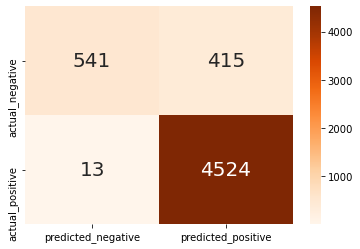

In [41]:
# Here's the heat map for the 2nd Ada Boost model
cm8 = conf_matrix(y_test, y_pred_tfidf2_sv)

In [42]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(zip(cm7, cm8)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['SVM1-TFIDF', 'SVM2-TFIDF']
results

,SVM1-TFIDF,SVM2-TFIDF
Accuracy,0.949,0.922
Precision,0.952,0.916
Recall,0.988,0.997
F1 Score,0.970,0.955


In [43]:
# Compile all of the error metrics into a dataframe for comparison
results_tf = pd.DataFrame(list(zip(cm1, cm2, cm3, cm4,cm5, cm6, cm7, cm8)))
results_tf = results_tf.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_tf.columns = ['LR1-TFIDF', 'LR2-TFIDF','Naive1-TFIDF', 'Naive2-TFIDF', 'AdaBoost1-TFIDF', 'AdaBoost2-TFIDF','SVM1-TFIDF', 'SVM2-TFIDF']
results_tf

results = pd.concat([results_tf], axis=1)
results

,LR1-TFIDF,LR2-TFIDF,Naive1-TFIDF,Naive2-TFIDF,AdaBoost1-TFIDF,AdaBoost2-TFIDF,SVM1-TFIDF,SVM2-TFIDF
Accuracy,0.944,0.905,0.832,0.829,0.914,0.910,0.949,0.922
Precision,0.943,0.897,0.831,0.830,0.930,0.925,0.952,0.916
Recall,0.991,0.999,1.000,0.997,0.970,0.970,0.988,0.997
F1 Score,0.966,0.945,0.908,0.906,0.950,0.947,0.970,0.955


In [44]:
#saving the data
data.to_csv('Trip_Advisor_2nd.csv')

In [45]:
#saving df1
df1.to_csv('Trip_df1.csv')